# 1 . Viết một  chương  trình  mô  phỏng  chuỗi  thời  gian có tính xu  thế  và  mùa 

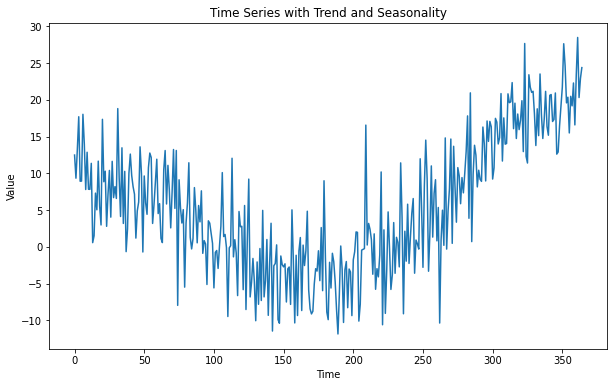

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Function to generate time series with trend and seasonality
def generate_time_series(timesteps, trend_strength=0.03, seasonality_strength=10):
    time = np.arange(timesteps)
    
    # Trend component
    trend = trend_strength * time
    
    # Seasonality component
    seasonality = seasonality_strength * np.cos(2 * np.pi * time / 365)
    
    # Random noise
    noise = np.random.normal(scale=5, size=timesteps)
    
    # Combine components
    time_series = trend + seasonality + noise
    
    return time_series

# Generate time series data
timesteps = 365  # One year
time_series = generate_time_series(timesteps)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(time_series)
plt.title('Time Series with Trend and Seasonality')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


# 2. Xây  dựng   chương  trình  đầu  vào  là  dữ  liệu  mô  phỏng  của  ý  1 đầu  ra  tìm  ra  bộ  sk  với  k  =1,...,d.

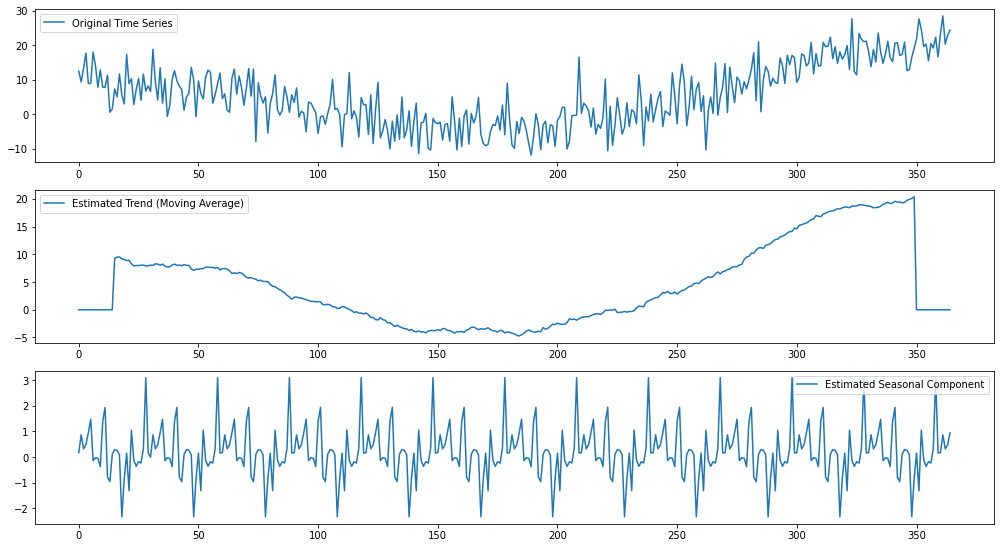

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Generate time series data
# timesteps = 365
# time_series = generate_time_series(timesteps)

# Function to estimate trend using moving average
def estimate_trend_moving_average(data, period):
    half_period = period // 2
    trend = np.zeros_like(data, dtype=float)
    
    for t in range(half_period, len(data) - half_period):
        trend[t] = np.sum(data[t - half_period : t + half_period + 1])/period
    return trend

# Function to estimate seasonal component
def estimate_seasonal_component(data, period):
    seasonal = np.zeros_like(data, dtype=float) 
    trend = estimate_trend_moving_average(data, period)
    
    for k in range(1, period + 1):
        deviations = []
        for t in range(k, len(data) - period, period):
            deviations.append(data[t] - trend[t])
        
        wk = np.mean(deviations)
        seasonal[k - 1] = wk - np.sum(deviations) / period 
    # seasonal[period:] = seasonal[:period] # Repeat for k > d
    for i in range(k+1, len(seasonal)):
        seasonal[i] = seasonal[int(i%period)]

    
    return seasonal

# Estimate trend using moving average
period = 30  
trend_ma = estimate_trend_moving_average(time_series, period)

# Estimate seasonal component
seasonal_component = estimate_seasonal_component(time_series, period)

# Plotting
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(time_series, label='Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend_ma, label='Estimated Trend (Moving Average)')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal_component, label='Estimated Seasonal Component')
plt.legend()

plt.tight_layout()
plt.show()


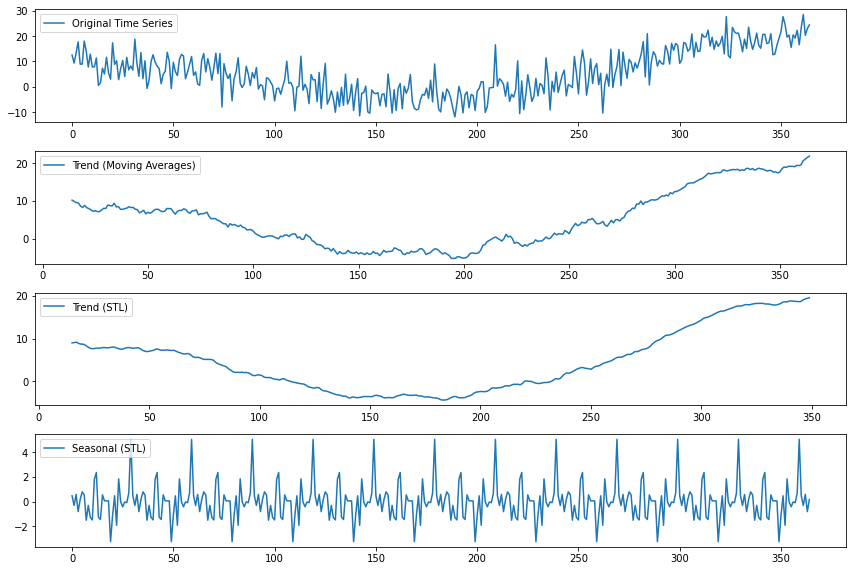

In [10]:
# sử dụng thư viện statsmodels
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate time series data
# timesteps = 365
# time_series = generate_time_series(timesteps)

# Method 1: Moving Averages for Trend
window_size = 15
moving_avg = np.convolve(time_series, np.ones(window_size)/window_size, mode='valid')
trend_component = np.concatenate((np.full(window_size-1, np.nan), moving_avg))

# Method 2: Seasonal Decomposition of Time Series (STL)
period = 30
result = seasonal_decompose(time_series, period=period)
trend_stl = result.trend
seasonal_stl = result.seasonal
residual_stl = result.resid

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(time_series, label='Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend_component, label='Trend (Moving Averages)')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(trend_stl, label='Trend (STL)')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(seasonal_stl, label='Seasonal (STL)')
plt.legend()

plt.tight_layout()
plt.show()


# 3. Xây  dựng  chương  trình  tách trend và mùa bằng phương pháp Holt-winters

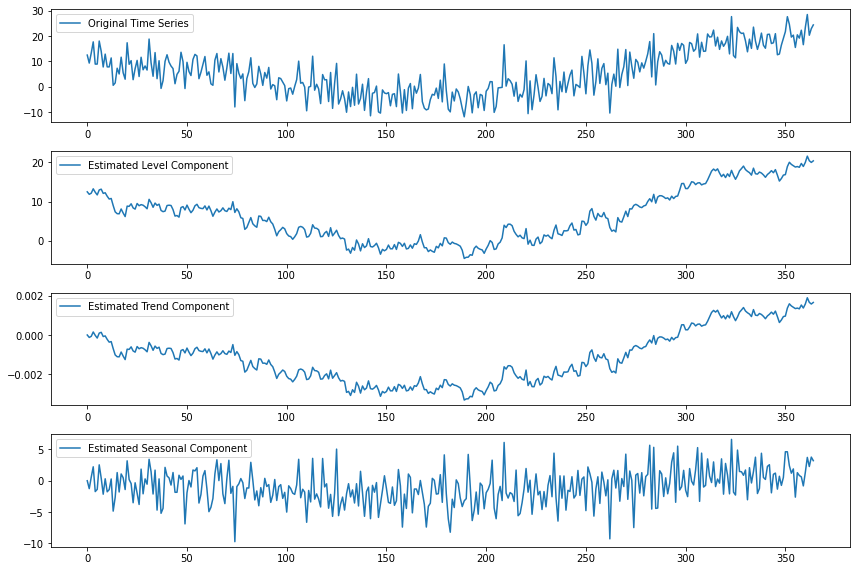

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function to fit Holt-Winters model
def holt_winters(time_series, alpha, beta, gamma, seasonal_periods):
    n = len(time_series)
    level = np.zeros(n)
    trend = np.zeros(n)
    seasonal = np.zeros(n)

    # Initialize level, trend, and seasonal components
    level[0] = time_series[0]
    trend[0] = 0 

    for t in range(1, n):
        # Update level component
        level[t] = alpha * (time_series[t] - seasonal[t  - seasonal_periods]) + (1 - alpha) * (level[t - 1] + trend[t - 1])

        # Update trend component
        trend[t] = beta * (level[t] - level[t - 1]) + (1 - beta) * trend[t - 1]

        # Update seasonal component
        seasonal[t] = gamma * (time_series[t] - level[t -1] -  trend[t-1]) + (1 - gamma) * seasonal[t  - seasonal_periods]

    return level, trend, seasonal

# Generate time series data
# timesteps = 365
# time_series = generate_time_series(timesteps)

# Set hyperparameters
alpha = 0.2
beta = 0.0002
gamma = 0.4
seasonal_periods = 12

# Fit Holt-Winters model
estimated_level, estimated_trend, estimated_seasonal= holt_winters(time_series, alpha, beta, gamma, seasonal_periods)

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(time_series, label='Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(estimated_level, label='Estimated Level Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(estimated_trend, label='Estimated Trend Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(estimated_seasonal, label='Estimated Seasonal Component')
plt.legend()
plt.tight_layout()
plt.show()
